# Research on car sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np 
df = pd.read_csv('/datasets/vehicles_us.csv')
print('---Opened the data file and studied the general information---')
df.info()#getting imformation about datatypes and columns
df.describe()#getting information of the table mean, max values length etc. 
df

---Opened the data file and studied the general information---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Conclusion

The dataset contains the following fields:
•	price
•	model_year
•	model
•	condition
•	cylinders
•	fuel — gas, diesel, etc.
•	odometer — the vehicle's mileage when the ad was published
•	transmission
•	paint_color
•	is_4wd — whether the vehicle has 4-wheel drive (Boolean type)
•	date_posted — the date the ad was published
•	days_listed — from publication to removal
Result is printed with datatype information and general description.

In this we can analyse the price of second hand vehicle by considering all factors with wich we can predict how market is going currently. what things are in demand regarding this business? and how we can improve it.

### Step 2. Data preprocessing

In [2]:
print(df.isnull().sum())#checked the missing values

df['model_year_noempty']= df.groupby('model')['model_year'].transform(lambda y : y.fillna(y.mode()[0]))#used mode method tofill values with most common year used for that particular model
df['odometer_noempty']= df.groupby('model_year_noempty')['odometer'].transform(lambda y : y.fillna(y.mean()))# used mean to fill mileage with all the vlues mean used in that perticular year
df['paint_color_noempty']= df['paint_color'].fillna('unknown')#filling paint color with unknown because we don't have info for it
df['cylinders_noempty']= df.groupby('model')['cylinders'].transform(lambda y : y.fillna(y.mode()[0]))# filling up missing values with most common number of cylinders used with perticular model


convert_dict = {'model_year_noempty': int, 
                'cylinders_noempty': int
               } 
  
df = df.astype(convert_dict) #changed datatypes into int for further calculation
df.info()
df

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
price                  51525 non-null int64
model_year             47906 non-null float64
model                  51525 non-null object
condition              51525 non-null object
cylinders              46265 non-null float64
fuel                   51525 non-null object
odometer               43633 non-null float64
transmission           51525 non-null object
type                   51525 non-null object
paint_color            42258 non-null object
is_4wd                 25572 non-null float64
date_posted            51525 non-null object
days_listed            51525 non-null int64
model

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_noempty,odometer_noempty,paint_color_noempty,cylinders_noempty
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011,145000.000000,unknown,6
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2013,88705.000000,white,6
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2013,110000.000000,red,4
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003,161160.333599,unknown,8
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2017,80903.000000,black,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37,2013,88136.000000,black,6
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22,2002,181500.000000,white,4
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32,2009,128000.000000,blue,4
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71,2013,139573.000000,black,4


1. It looks like some customers forgot to add model year or may be they don't have much information on it so we changed it by grouping model year with model and took most common year given for it.
2. To Fill missing values in the Mileage we used group by method and filled it with mean so it should not affect our data and further analysis.
3. Paint color we filled with Unknown as we can't predict it but I think User has forgot to put it or may be just skipped this stage to fill it.
4. for missing cylinders we used same logic as of model year above.

### Step 3. Make calculations and add them to the table

In [3]:
condition_dict = {'salvage':0,
                 'fair':1,
                 'good':2,
                 'excellent':3,
                 'like new':4,
                 'new':5}
df['condition_id']=df['condition'].apply(lambda x:condition_dict[x])#changing condition column with index values and savve it in new column
df['condition_id'].value_counts()
df['DateTime'] = df['date_posted'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))#used datetime format
df['weekday'] = df['DateTime'].dt.weekday#finding weekday
df['dayofmonth'] = df['DateTime'].dt.day#finding dayof the month
df['dayofyear'] = df['DateTime'].dt.dayofyear#finding day of the year
df['year'] = pd.DatetimeIndex(df['DateTime']).year#taking year out from date posted
df['age_of_the_vehicle'] = df['year'] - df['model_year_noempty'] #calculated age of the vehicle by posting year and model year
df.loc[df['age_of_the_vehicle'] == 0,'age_of_the_vehicle']= 1#changed 0 to 1 as we need this values in further calculation

df['avg_mileage'] = df['odometer_noempty']/df['age_of_the_vehicle']#calculated avg mileage 
df


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,paint_color_noempty,cylinders_noempty,condition_id,DateTime,weekday,dayofmonth,dayofyear,year,age_of_the_vehicle,avg_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,...,unknown,6,2,2018-06-23,5,23,174,2018,7,20714.285714
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,...,white,6,2,2018-10-19,4,19,292,2018,5,17741.000000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,...,red,4,4,2019-02-07,3,7,38,2019,6,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,...,unknown,8,1,2019-03-22,4,22,81,2019,16,10072.520850
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,...,black,4,3,2019-04-02,1,2,92,2019,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,...,black,6,4,2018-10-03,2,3,276,2018,5,17627.200000
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,...,white,4,0,2018-11-14,2,14,318,2018,16,11343.750000
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,...,blue,4,3,2018-11-15,3,15,319,2018,9,14222.222222
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,...,black,4,2,2018-07-02,0,2,183,2018,5,27914.600000


Calculated following parameters:
•	Day of the week, month, and year the ad was placed
•	The vehicle's age (in years) when the ad was placed
•	The vehicle's average mileage per year
This will give an idea about our first conclusion mentioned above to get an idea of what is going on in current market for this business.


### Step 4. Carry out exploratory data analysis

4.0
12.0
8.0
5000.0
16839.0
11839.0
2.0
3.0
1.0
73289.0
151480.0
78191.0
4.0
8.0
4.0
19.0
53.0
34.0


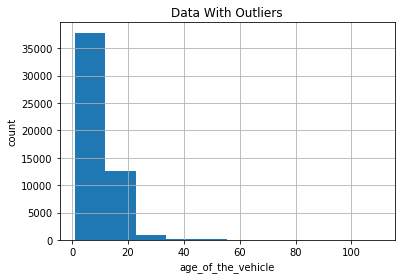

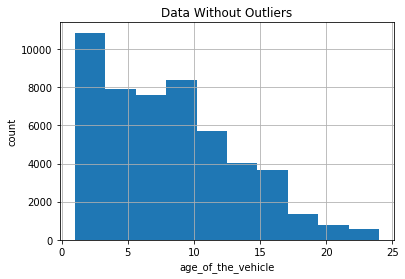

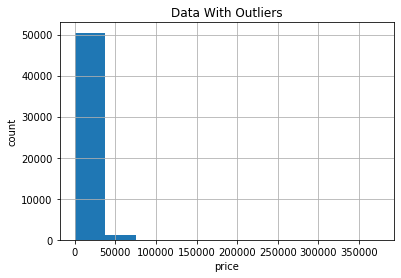

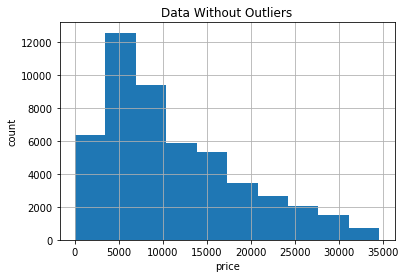

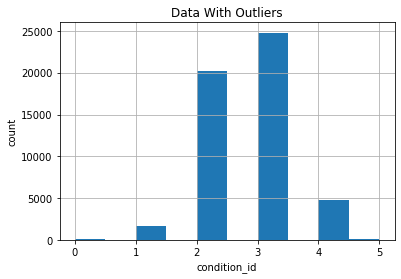

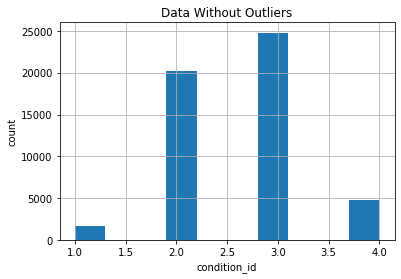

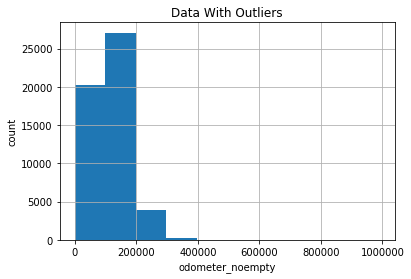

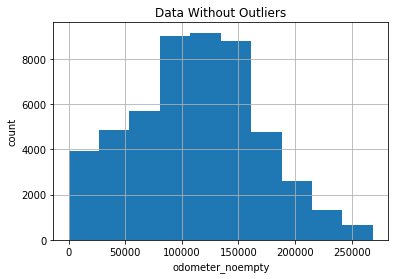

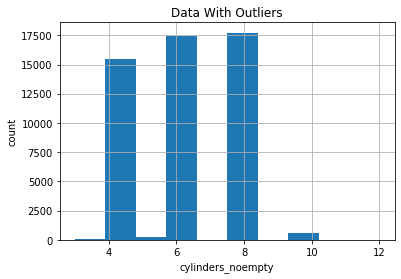

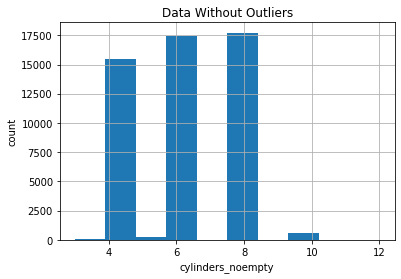

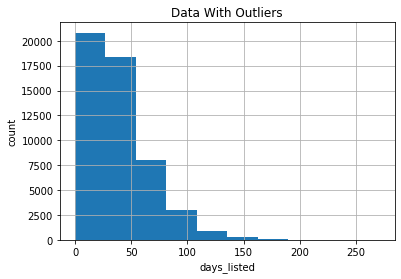

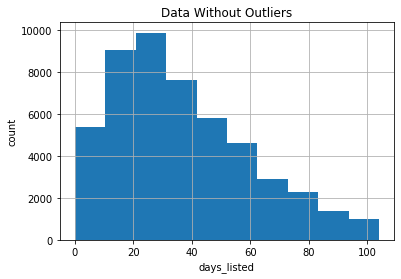

In [4]:
import pylab as pl
import matplotlib.pyplot as plot

columns_to_be_cleaned = ['age_of_the_vehicle','price', 'condition_id','odometer_noempty','cylinders_noempty','days_listed']
#Used for loop to plot graphs for given inforamation with and without outliers
for x in columns_to_be_cleaned:
    Q1_vehicle_age = df[x].quantile(0.25)
    print(Q1_vehicle_age)
    Q3_vehicle_age = df[x].quantile(0.75)
    print(Q3_vehicle_age)
    IQR_vehicle_age = Q3_vehicle_age - Q1_vehicle_age
    print(IQR_vehicle_age)
    new_df = df.query(f"{x} >= @Q1_vehicle_age - 1.5*@IQR_vehicle_age and {x} <= @Q3_vehicle_age+1.5*@IQR_vehicle_age")
    df.hist(x,sharex=True, sharey=True)
    pl.title('Data With Outliers')
    pl.xlabel(f'{x}')
    pl.ylabel('count')
    new_df.hist(x,sharex=True, sharey=True)
    pl.title('Data Without Outliers')
    pl.xlabel(f'{x}')
    pl.ylabel('count')



Here we studied different parameters of data by using histograms but also we eliminated unwanted eliments from data by using outliers to understand stability of the histograms.

In [5]:
#print(new_df.sort_values('days_listed').head())
print('Mean of ads displyed for all given data:', new_df['days_listed'].mean())#calculated mean of raw data
print('Median of ads displyed for all given data:',new_df['days_listed'].median())#calculated median of raw data
print('Mode of ads displyed for all given data:',new_df['days_listed'].mode())#calculated mode to find out typical lifetime of ads 
new_df['long time'] = new_df['days_listed'] >= 104
print(new_df['long time'].value_counts())
new_df['short time'] = new_df['days_listed'] <= 0
print(new_df['short time'].value_counts())


Mean of ads displyed for all given data: 36.6719297894083
Median of ads displyed for all given data: 32.0
Mode of ads displyed for all given data: 0    18
dtype: int64
False    49824
True        83
Name: long time, dtype: int64
False    49853
True        54
Name: short time, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Mean of ads displyed for filtered data: 36.59943741209564
Mean of ads displyed for filtered data: 32.0
Mean of ads displyed for filtered data: 0    18
dtype: int64


Text(0, 0.5, 'Count')

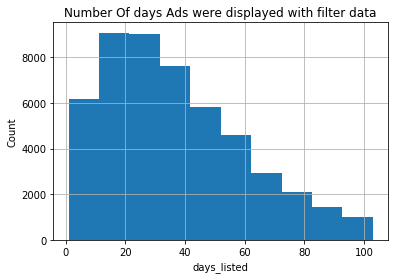

In [6]:
filtered_data = new_df.query('0 < days_listed < 104')
print('Mean of ads displyed for filtered data:',filtered_data['days_listed'].mean())
print('Mean of ads displyed for filtered data:',filtered_data['days_listed'].median())
print('Mean of ads displyed for filtered data:',filtered_data['days_listed'].mode())#calculated mode to find out typical lifetime of ads
filtered_data.hist('days_listed',sharex=True, sharey=True)
pl.title('Number Of days Ads were displayed with filter data')
pl.xlabel('days_listed')
pl.ylabel('Count')

Here we studied the advertisement lifespan. we stored data when ads were removed quickly, and when they were listed for an abnormally long time. and also calculated mode to find out typical lifetime of advertisement.
quick removal is o days which are 54 ads removed same day.
long time is 104 days which are 83 ads removed after long days.

                    price
type                     
hatchback     6869.202756
sedan         6962.732654
mini-van      8207.729560
wagon         9121.761486
van          10451.116776
other        10962.434263
SUV          11166.811541
offroad      14368.757282
coupe        14379.396768
convertible  14532.709977
pickup       16050.831517
truck        16723.718753
bus          17135.666667
             price
type              
truck        11993
SUV          11992
sedan        11775
pickup        6790
coupe         2228
wagon         1480
mini-van      1113
hatchback     1016
van            608
convertible    431
other          251
offroad        206
bus             24
---SUV and truck are the two types with the greatest number of ads---


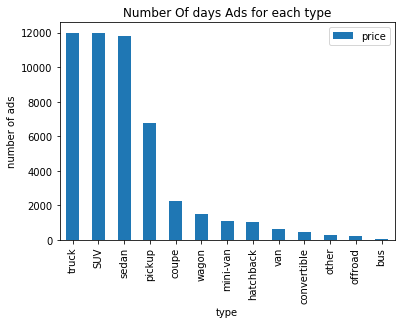

In [5]:
ad_pivot = new_df.pivot_table(index = 'type', values = 'price',aggfunc = 'mean')
print(ad_pivot.sort_values('price'))#calculated average price for each type of vehicle
import matplotlib.pyplot as plt
ad_pivot_1 = new_df.pivot_table(index = 'type', values = 'price',aggfunc = 'count')
ad_pivot1_sorted = ad_pivot_1.sort_values('price',ascending = False)
print(ad_pivot1_sorted)
ad_pivot1_sorted.plot(sharex=True, sharey=True,kind='bar')#graph to show dependence of the number of ads on the vehicle type
pl.title('Number Of days Ads for each type')
pl.xlabel('type')
pl.ylabel('number of ads')
print('---SUV and truck are the two types with the greatest number of ads---')

Here we studied number of ads and the average price for each type of vehicle. The two types with the greatest number of ads are truck and SUV.

In [36]:
filter_data_truck_rev = new_df.query('type == "truck"')
filter_data_truck_rev['paint_color'].value_counts()


white     3628
black     1540
red       1017
silver     994
grey       926
blue       855
custom     304
green      273
brown      247
yellow      66
orange      47
purple      16
Name: paint_color, dtype: int64

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 8.468063704945516 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 2.5945515507124894 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 8.468063704945516 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 121951.64063128748 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_lis

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,paint_color_noempty,cylinders_noempty,condition_id,DateTime,weekday,dayofmonth,dayofyear,year,age_of_the_vehicle,avg_mileage
22,7500,2004.0,chevrolet silverado,like new,8.0,gas,180000.0,automatic,truck,red,...,red,8,4,2019-01-05,5,5,5,2019,15,12000.000000
39,8000,2009.0,ford f-150,good,8.0,gas,234000.0,automatic,truck,black,...,black,8,2,2019-03-31,6,31,90,2019,10,23400.000000
50,6200,2006.0,ford f-150,excellent,6.0,gas,69698.0,automatic,truck,custom,...,custom,6,3,2018-05-03,3,3,123,2018,12,5808.166667
53,10400,2012.0,chevrolet colorado,excellent,5.0,gas,111871.0,automatic,truck,red,...,red,5,3,2019-01-30,2,30,30,2019,7,15981.571429
60,13000,2005.0,ram 1500,good,8.0,gas,146000.0,automatic,truck,grey,...,grey,8,2,2019-03-14,3,14,73,2019,14,10428.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,...,white,6,1,2018-09-18,1,18,261,2018,5,3160.800000
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,...,white,8,3,2018-12-27,3,27,361,2018,5,40600.000000
51497,2995,2001.0,ford f150,good,8.0,gas,206257.0,automatic,truck,red,...,red,8,2,2018-12-02,6,2,336,2018,17,12132.764706
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,...,unknown,8,3,2019-01-25,4,25,25,2019,8,15677.485011


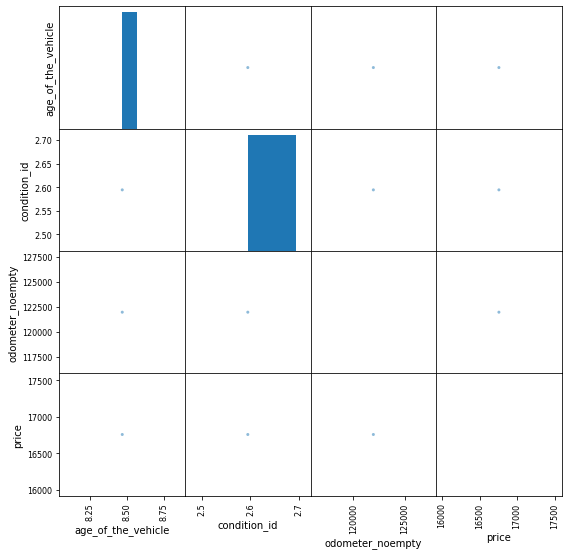

In [38]:

filter_data_truck = new_df.query('type == "truck" and paint_color_noempty != ("orange","purple")')#filtered data with more than 50 numbers of ads as per given condition
filter_data_pivot_truck = filter_data_truck.pivot_table(index = 'type', values = ['age_of_the_vehicle', 'odometer_noempty','condition_id','price'])
pd.plotting.scatter_matrix(filter_data_pivot_truck, figsize = (9, 9),grid=True)#Studying scatterplot matrix to find out price dependancy on the given parameters on each of the type we selected
filter_data_truck



Here we studied to find out whether the price depends on age, mileage, condition, transmission type, and color. by analysing scattermatrix we can conclude that For Good Condition truck type model price is leading upto 17000 with old models upto seven and half year and which ran for less than 115000 kms.
Yes we can say price is dependant on mostly condition and age of the vehicle.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 8.517604447439354 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 2.6910377358490565 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 8.517604447439354 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 118608.3313186629 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,paint_color_noempty,cylinders_noempty,condition_id,DateTime,weekday,dayofmonth,dayofyear,year,age_of_the_vehicle,avg_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,...,unknown,6,2,2018-06-23,5,23,174,2018,7,20714.285714
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,...,black,6,3,2019-01-07,0,7,7,2019,6,18245.500000
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,...,unknown,4,3,2018-07-16,0,16,197,2018,6,17362.333333
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,...,blue,6,3,2019-02-15,4,15,46,2019,11,13381.000000
14,12990,2009.0,gmc yukon,excellent,8.0,gas,132285.0,automatic,SUV,black,...,black,8,3,2019-01-31,3,31,31,2019,10,13228.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51494,7999,2009.0,chevrolet equinox,excellent,6.0,gas,95021.0,automatic,SUV,silver,...,silver,6,3,2019-01-03,3,3,3,2019,10,9502.100000
51495,9500,2012.0,chevrolet traverse,good,6.0,gas,144500.0,automatic,SUV,NaN,...,unknown,6,2,2019-03-05,1,5,64,2019,7,20642.857143
51496,4999,2002.0,toyota 4runner,excellent,6.0,gas,177901.0,automatic,SUV,NaN,...,unknown,6,3,2018-05-26,5,26,146,2018,16,11118.812500
51500,6995,2012.0,buick enclave,excellent,6.0,gas,157000.0,automatic,SUV,white,...,white,6,3,2018-08-04,5,4,216,2018,6,26166.666667


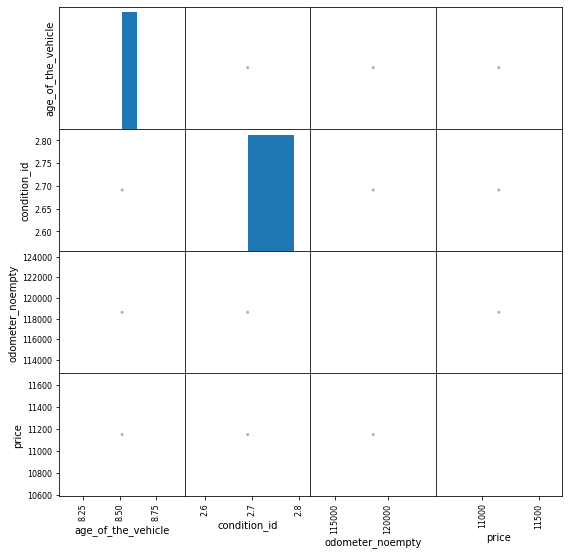

In [37]:
filter_data_suv = new_df.query('type == "SUV" and paint_color_noempty != ("orange","purple")')
filter_data_pivot_suv = filter_data_suv.pivot_table(index = 'type', values = ['age_of_the_vehicle', 'odometer_noempty','condition_id','price'])
pd.plotting.scatter_matrix(filter_data_pivot_suv, figsize = (9, 9),grid=True)#repeating steps from above for SUV type
filter_data_suv




Here we studied to find out whether the price depends on age, mileage, condition, transmission type, and color. by analysing scattermatrix we can conclude that For Good to excellent Condition SUV type model price is leading upto 17000 with old models upto nine and half year and which ran for less than 130000 kms.
Yes we can say price is dependant on mostly condition(Between good and Excellent) and age of the vehicle.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


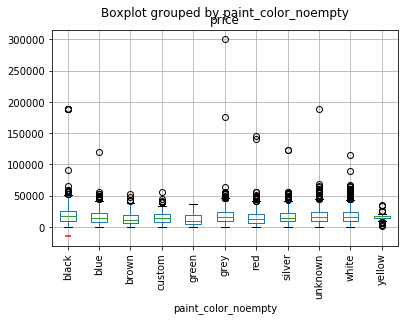

In [43]:
filter_data_truck.boxplot(column=['price'], by='paint_color_noempty',
                     return_type='axes')
Q1 = filter_data_truck['price'].quantile(0.25)
Q3 = filter_data_truck['price'].quantile(0.75)
IQR = Q3 - Q1
plt.xticks(rotation=90)
plt.hlines(y= [Q1-1.5*IQR], xmin=0.9, xmax=1.1, color='red')#plotting boxplot for categorical variable colors with whiskers for truck




Upon visual inspection of boxplots of price affected mostly by black color for truck  we can see that the price for color black is high range for truck

Drag have the lowest price range for Yellow and Brown color.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


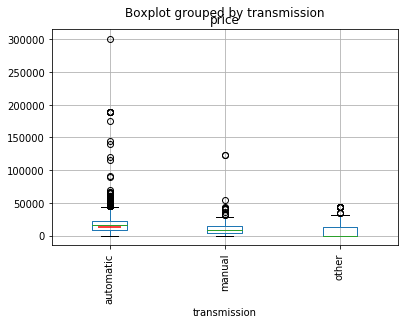

In [40]:
filter_data_truck.boxplot(column=['price'], by='transmission',
                     return_type='axes')

plt.xticks(rotation=90)
plt.hlines(y= Q1, xmin=0.9, xmax=1.1, color='red')#plotting box plot for transmission type in truck



Upon visual inspection of boxplots of price affected mostly by automatic transmission for truck  we can see that the price for automatic transmission is high range for truck

Drag have the lowest price range for manual transmission in truck.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


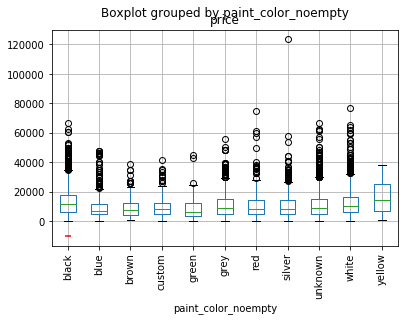

In [42]:
filter_data_suv.boxplot(column=['price'], by='paint_color_noempty',
                     return_type='axes')
Q1 = filter_data_suv['price'].quantile(0.25)
Q3 = filter_data_suv['price'].quantile(0.75)
IQR = Q3 - Q1
plt.xticks(rotation=90)
plt.hlines(y= [Q1-1.5*IQR], xmin=0.9, xmax=1.1, color='red') #repeating same for SUV




Upon visual inspection of boxplots of price affected mostly by black and red color for SUV  we can see that the price for these colors is high range for SUV

Drag have the lowest price range for  Brown and custom color.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


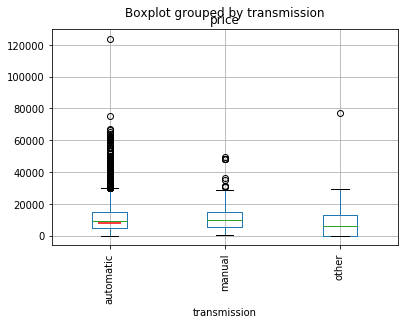

In [44]:
filter_data_suv.boxplot(column=['price'], by='transmission',
                     return_type='axes')
plt.xticks(rotation=90)
plt.hlines(y= Q1, xmin=0.9, xmax=1.1, color='red') #repeating same for SUV




Upon visual inspection of boxplots of price affected mostly manual transmission for SUV  we can see that the price for manual transmission is high range for SUV

Drag have the lowest price range for automatic transmission.

### Step 5. Overall conclusion

Overall in conclusion I would like to conclude that factors influence the price of a vehicles are mostly Age, Vehicle type and Condition of the vehicle as we took two most popular type SUV and truck. The prorities of customer varied for other factors but the condition of the vehicle and age of the vehicle really got stable.  Condition parameter was equal to or more than Good and age varied upto 9 years.

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn